<a href="https://colab.research.google.com/github/MohitPolisetty/DS-Experiments-TY-CSE-AI-DS/blob/main/Experiment11DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features selected by Lasso (Non-zero coefficients):
petal length (cm)    0.304309
petal width (cm)     0.378882
dtype: float64
Lasso Regression R^2 Score: 0.9356732855719233

Feature Importance (Random Forest):
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


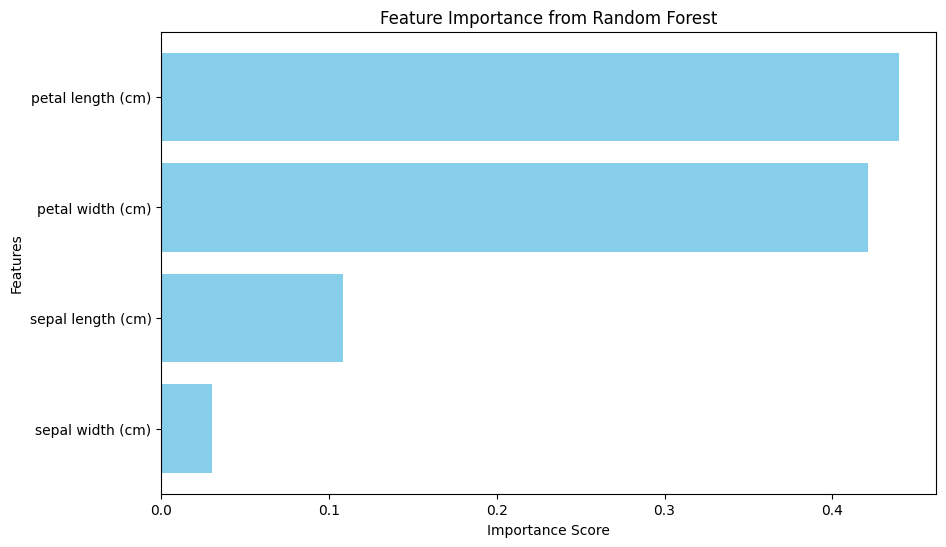


Features selected by ElasticNet (Non-zero coefficients):
sepal width (cm)    -0.028093
petal length (cm)    0.326326
petal width (cm)     0.378389
dtype: float64
ElasticNet Regression R^2 Score: 0.9404633314270668


In [1]:
# Import necessary libraries for analysis and modeling
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Independent variables
y = iris.target  # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize the features for uniform scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Lasso Regression (L1 Regularization for Feature Selection)
lasso_model = Lasso(alpha=0.1)  # Regularization parameter
lasso_model.fit(X_train_scaled, y_train)

# Extract non-zero coefficients to identify important features
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
lasso_selected_features = lasso_coefficients[lasso_coefficients != 0]

print("Features selected by Lasso (Non-zero coefficients):")
print(lasso_selected_features)

# Assess Lasso's performance on the test dataset
lasso_r2_score = lasso_model.score(X_test_scaled, y_test)
print(f"Lasso Regression R^2 Score: {lasso_r2_score}")

# 2. Random Forest Classifier (Assess Feature Importance)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
rf_model.fit(X_train, y_train)

# Compute the importance of each feature based on tree splits
rf_feature_importances = rf_model.feature_importances_
rf_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(rf_features_df)

# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(rf_features_df['Feature'], rf_features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

# 3. ElasticNet Regression (Combining L1 and L2 Regularization)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Blend of L1 and L2 penalties
elasticnet_model.fit(X_train_scaled, y_train)

# Identify features with non-zero coefficients
elasticnet_coefficients = pd.Series(elasticnet_model.coef_, index=X.columns)
elasticnet_selected_features = elasticnet_coefficients[elasticnet_coefficients != 0]

print("\nFeatures selected by ElasticNet (Non-zero coefficients):")
print(elasticnet_selected_features)

# Evaluate ElasticNet's predictive performance
elasticnet_r2_score = elasticnet_model.score(X_test_scaled, y_test)
print(f"ElasticNet Regression R^2 Score: {elasticnet_r2_score}")
